In [ ]:
import json
import pandas as pd

# Carregar os arquivos
with open('Bases/graphAPI_selenium_results.json', encoding='utf-8') as f:
    data_graphapi = json.load(f)

with open('Bases/instagram_profiles.json', encoding='utf-8') as f:
    data_profiles = json.load(f)

with open('Bases/selenium_results.json', encoding='utf-8') as f:
    data_selenium = json.load(f)

In [ ]:
# graphAPI_selenium_results
df_graphapi_main = pd.json_normalize(data_graphapi)
df_graphapi_posts = pd.json_normalize(data_graphapi, record_path='media', meta=['username'])

# instagram_profiles
df_profiles_main = pd.json_normalize(data_profiles)
df_profiles_posts = pd.json_normalize(data_profiles, record_path='Posts', meta=['Username'])

# selenium_results
df_selenium_main = pd.json_normalize(data_selenium)
df_selenium_posts = pd.json_normalize(data_selenium, record_path='media', meta=['username'])

In [ ]:
df_graphapi_posts

,timestamp,like_count,comments_count,caption,id,username
0,2025-03-14T13:44:35+0000,41.0,0,Os melhores profissionais vestem DAM\n\nO chef...,18094170337554772,damroupas
1,2025-03-08T20:23:03+0000,12.0,0,"Aqui, liderança feminina não é exceção, é a re...",18038847902442130,damroupas
2,2025-03-01T13:44:31+0000,27.0,2,É carnaval em Pernambuco! E no maior bloco do ...,18045211112357559,damroupas
3,2025-02-26T00:42:17+0000,137.0,17,NEGRA LINDA: A FORÇA QUE VESTE A GASTRONOMIA! ...,17913152613089916,damroupas
4,2025-02-24T18:30:27+0000,43.0,6,3• Fórum para a Patrimonialização da Mariscada,18044639906074793,damroupas
...,...,...,...,...,...,...
1761,2022-08-22T23:00:03+0000,78.0,7,NaN,18023341318404551,_treves_
1762,2022-07-13T00:44:34+0000,38.0,0,🏃‍♀️💨,17951690341954753,_treves_
1763,2022-05-12T02:43:38+0000,39.0,0,This ain’t even my cat but I just rly like the...,18017777290391125,_treves_
1764,2022-04-08T12:57:31+0000,44.0,0,NaN,17907900968392650,_treves_


In [ ]:
df_graphapi_posts['timestamp'] = pd.to_datetime(df_graphapi_posts['timestamp'], errors='coerce')

df_graphapi_posts.drop_duplicates(inplace=True)
df_graphapi_posts['timestamp'] = df_graphapi_posts['timestamp'].dt.date
df_graphapi_posts['like_count'] = df_graphapi_posts['like_count'].fillna(0)

print(df_graphapi_posts.isna().sum())

timestamp           0
like_count          0
comments_count      0
caption           241
id                  0
username            0
dtype: int64


In [5]:
df_graphapi_posts

,timestamp,like_count,comments_count,caption,id,username
0,2025-03-14,41.0,0,Os melhores profissionais vestem DAM\n\nO chef...,18094170337554772,damroupas
1,2025-03-08,12.0,0,"Aqui, liderança feminina não é exceção, é a re...",18038847902442130,damroupas
2,2025-03-01,27.0,2,É carnaval em Pernambuco! E no maior bloco do ...,18045211112357559,damroupas
3,2025-02-26,137.0,17,NEGRA LINDA: A FORÇA QUE VESTE A GASTRONOMIA! ...,17913152613089916,damroupas
4,2025-02-24,43.0,6,3• Fórum para a Patrimonialização da Mariscada,18044639906074793,damroupas
...,...,...,...,...,...,...
1761,2022-08-22,78.0,7,NaN,18023341318404551,_treves_
1762,2022-07-13,38.0,0,🏃‍♀️💨,17951690341954753,_treves_
1763,2022-05-12,39.0,0,This ain’t even my cat but I just rly like the...,18017777290391125,_treves_
1764,2022-04-08,44.0,0,NaN,17907900968392650,_treves_


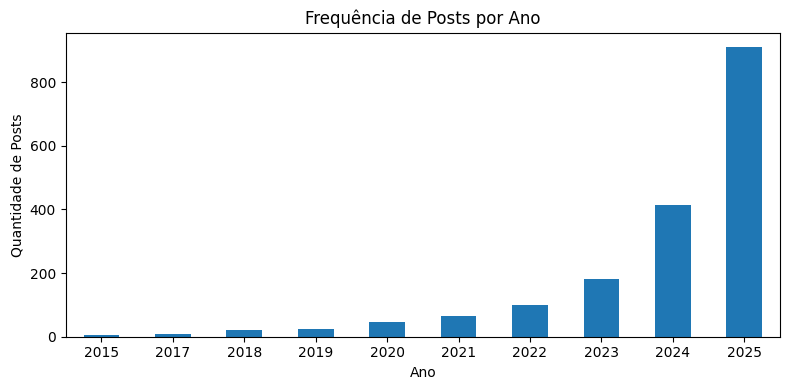

In [6]:
import matplotlib.pyplot as plt

df_graphapi_posts['timestamp'] = pd.to_datetime(df_graphapi_posts['timestamp'], errors='coerce')
posts_por_ano = df_graphapi_posts['timestamp'].dt.year.value_counts().sort_index()
plt.figure(figsize=(8, 4))
posts_por_ano.plot(kind='bar')
plt.title('Frequência de Posts por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Posts')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

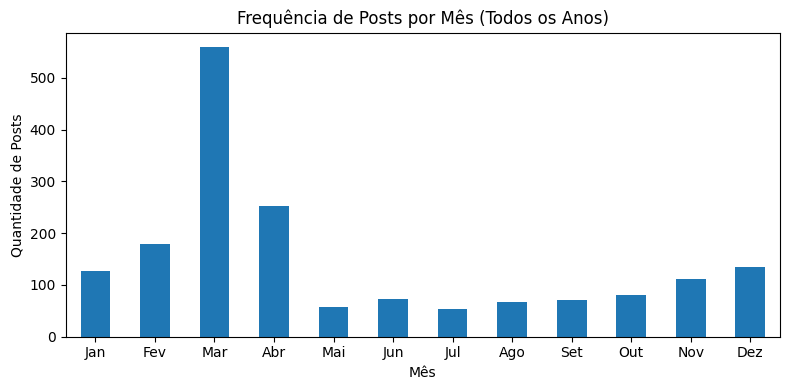

In [7]:
posts_por_mes = df_graphapi_posts['timestamp'].dt.month.value_counts().sort_index()


nomes_meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
posts_por_mes.index = [nomes_meses[i - 1] for i in posts_por_mes.index]

plt.figure(figsize=(8, 4))
posts_por_mes.plot(kind='bar')
plt.title('Frequência de Posts por Mês (Todos os Anos)')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Posts')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


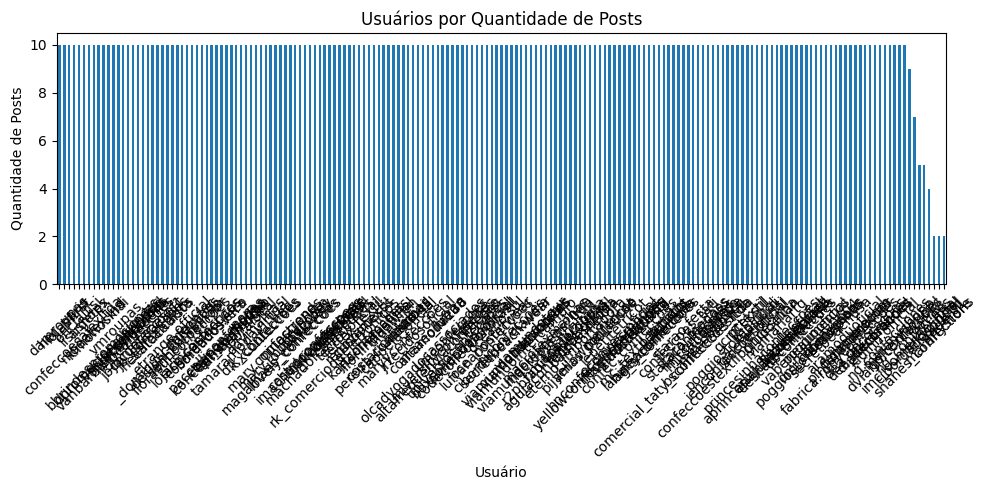

In [8]:
top_users = df_graphapi_posts['username'].value_counts().head(1700)

plt.figure(figsize=(10, 5))
top_users.plot(kind='bar')
plt.title('Usuários por Quantidade de Posts')
plt.xlabel('Usuário')
plt.ylabel('Quantidade de Posts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

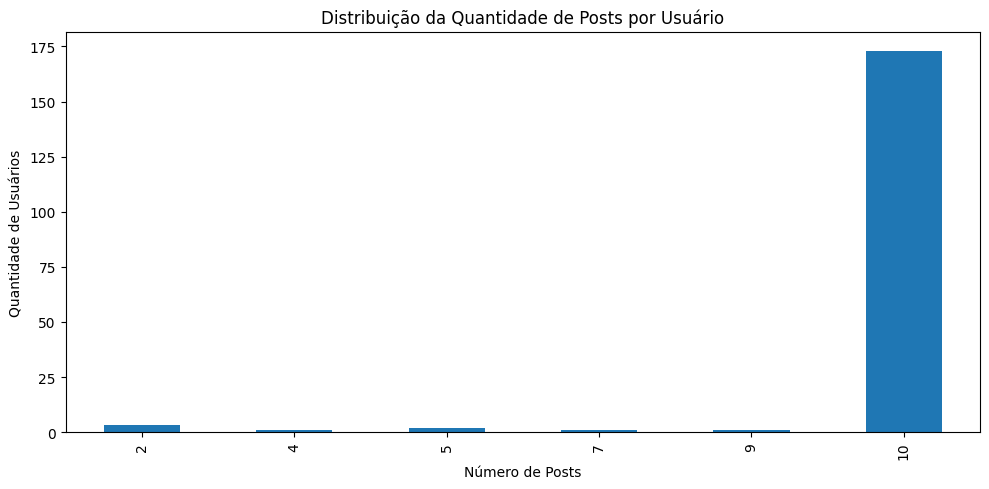

In [9]:
frequencia_posts = df_graphapi_posts['username'].value_counts()

plt.figure(figsize=(10, 5))
frequencia_posts.value_counts().sort_index().plot(kind='bar')
plt.title('Distribuição da Quantidade de Posts por Usuário')
plt.xlabel('Número de Posts')
plt.ylabel('Quantidade de Usuários')
plt.tight_layout()
plt.show()


In [10]:
df_profiles_posts

,description,date,Username
0,"Photo by LOJÃO DA CONSTRUÇÃO on February 26, 2...","February 26, 2025",lojaodaconstrucao_
1,Photo by LOJÃO DA CONSTRUÇÃO in LOJÃO DA CONST...,Unknown,lojaodaconstrucao_
2,Maquininha sem sinal? Sem problema!\n\nCom um ...,Unknown,lojaodaconstrucao_
3,"Photo by LOJÃO DA CONSTRUÇÃO on February 19, 2...","February 19, 2025",lojaodaconstrucao_
4,"Photo by LOJÃO DA CONSTRUÇÃO on February 17, 2...","February 17, 2025",lojaodaconstrucao_
...,...,...,...
22809,🚀 🌎 Impulsionados pelo pensamento inovador e p...,Unknown,medlevel_oficial
22810,Photo by Medlevel Com Imp e Exportação Mat Cir...,"April 11, 2024",medlevel_oficial
22811,Photo by Medlevel Com Imp e Exportação Mat Cir...,"April 11, 2024",medlevel_oficial
22812,Photo by Medlevel Com Imp e Exportação Mat Cir...,Unknown,medlevel_oficial


In [ ]:
df_profiles_posts['date'] = pd.to_datetime(df_profiles_posts['date'], errors='coerce')

In [12]:
print(df_profiles_posts.isna().sum())

description        0
date           10192
Username           0
dtype: int64


In [17]:
df_profiles_posts = df_profiles_posts.dropna(subset=['date']).copy()

In [19]:
print(df_profiles_posts['date'].isna().sum())
print(df_profiles_posts.shape)

0
(12622, 3)


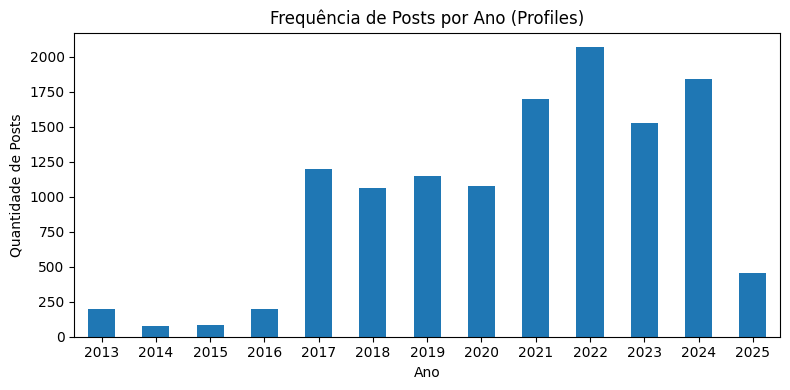

In [20]:
import matplotlib.pyplot as plt

df_profiles_posts['date'] = pd.to_datetime(df_profiles_posts['date'], errors='coerce')
df_profiles_posts['ano'] = df_profiles_posts['date'].dt.year

posts_por_ano = df_profiles_posts['ano'].value_counts().sort_index()

plt.figure(figsize=(8, 4))
posts_por_ano.plot(kind='bar')
plt.title('Frequência de Posts por Ano (Profiles)')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Posts')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


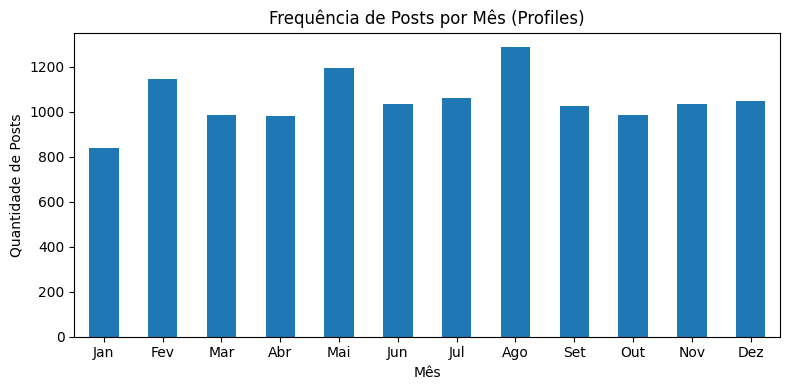

In [21]:
df_profiles_posts['mes'] = df_profiles_posts['date'].dt.month

posts_por_mes = df_profiles_posts['mes'].value_counts().sort_index()

nomes_meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
posts_por_mes.index = [nomes_meses[i - 1] for i in posts_por_mes.index]

plt.figure(figsize=(8, 4))
posts_por_mes.plot(kind='bar')
plt.title('Frequência de Posts por Mês (Profiles)')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Posts')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


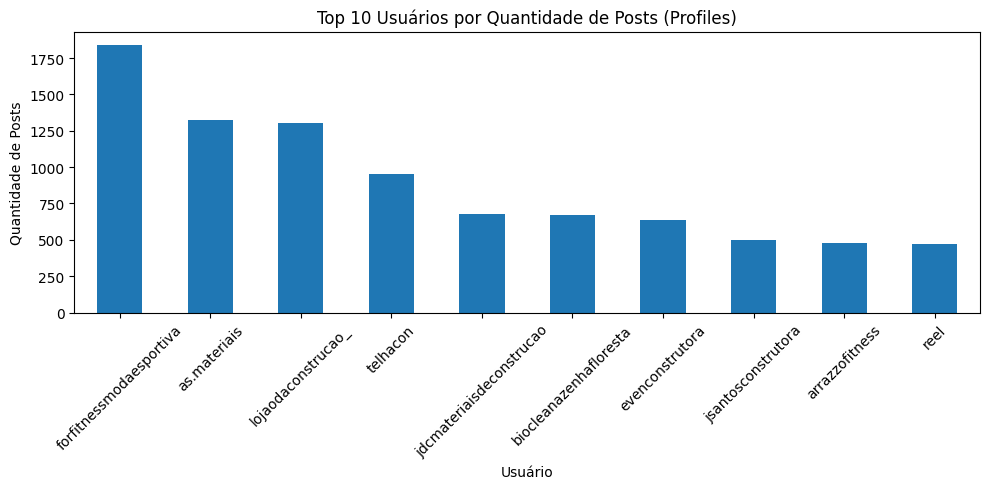

In [ ]:
top_10_usuarios = df_profiles_posts['Username'].value_counts().head(10)

plt.figure(figsize=(10, 5))
top_10_usuarios.plot(kind='bar')
plt.title('Top 10 Usuários por Quantidade de Posts (Profiles)')
plt.xlabel('Usuário')
plt.ylabel('Quantidade de Posts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
df_selenium_posts

,date,caption,username
0,Unknown,@ttheus_lps oh melhor 🤌🏼😍,kaelly.___
1,"November 14, 2024","Photo by 𝙺𝙻 on November 14, 2024. Nenhuma desc...",kaelly.___
2,Unknown,Photo by CONVÉS STORE in Atlântico Shopping. ...,conves_store
3,Unknown,Photo by CONVÉS STORE in Atlântico Shopping. ...,conves_store
4,Unknown,Photo by CONVÉS STORE in Atlântico Shopping w...,conves_store
...,...,...,...
286,"October 12, 2024","Photo by Treves Vvs on October 12, 2024. Nenhu...",treves
287,Unknown,"Photo by Treves Vvs in Moiliili, Hawaii. Nenhu...",treves
288,"September 12, 2024","Photo by Treves Vvs on September 12, 2024. Nen...",treves
289,"August 07, 2024","Photo by Treves Vvs on August 07, 2024. Nenhum...",treves


In [ ]:
df_selenium_posts['date'] = pd.to_datetime(df_selenium_posts['date'], errors='coerce')

C:\Users\celso\AppData\Local\Temp\ipykernel_16244\3457252739.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_selenium_posts['date'] = pd.to_datetime(df_selenium_posts['date'], errors='coerce')


In [25]:
df_selenium_posts

,date,caption,username
0,NaT,@ttheus_lps oh melhor 🤌🏼😍,kaelly.___
1,2024-11-14,"Photo by 𝙺𝙻 on November 14, 2024. Nenhuma desc...",kaelly.___
2,NaT,Photo by CONVÉS STORE in Atlântico Shopping. ...,conves_store
3,NaT,Photo by CONVÉS STORE in Atlântico Shopping. ...,conves_store
4,NaT,Photo by CONVÉS STORE in Atlântico Shopping w...,conves_store
...,...,...,...
286,2024-10-12,"Photo by Treves Vvs on October 12, 2024. Nenhu...",treves
287,NaT,"Photo by Treves Vvs in Moiliili, Hawaii. Nenhu...",treves
288,2024-09-12,"Photo by Treves Vvs on September 12, 2024. Nen...",treves
289,2024-08-07,"Photo by Treves Vvs on August 07, 2024. Nenhum...",treves


In [ ]:
df_selenium_posts = df_selenium_posts.dropna(subset=['date']).copy()

In [27]:
df_selenium_posts['ano'] = df_selenium_posts['date'].dt.year
df_selenium_posts['mes'] = df_selenium_posts['date'].dt.month

In [28]:
df_selenium_posts

,date,caption,username,ano,mes
1,2024-11-14,"Photo by 𝙺𝙻 on November 14, 2024. Nenhuma desc...",kaelly.___,2024,11
11,2019-05-21,"Photo shared by CONVÉS STORE on May 21, 2019 ...",conves_store,2019,5
14,2022-10-16,Photo by Store Importação e Exportação LTDA on...,storeimportacaoeexportacao,2022,10
16,2022-10-11,Photo by Store Importação e Exportação LTDA on...,storeimportacaoeexportacao,2022,10
17,2022-10-09,Photo by Store Importação e Exportação LTDA on...,storeimportacaoeexportacao,2022,10
...,...,...,...,...,...
284,2024-11-24,"Photo by Treves Vvs on November 24, 2024. Nenh...",treves,2024,11
285,2024-10-16,"Photo by Treves Vvs on October 16, 2024. Nenhu...",treves,2024,10
286,2024-10-12,"Photo by Treves Vvs on October 12, 2024. Nenhu...",treves,2024,10
288,2024-09-12,"Photo by Treves Vvs on September 12, 2024. Nen...",treves,2024,9


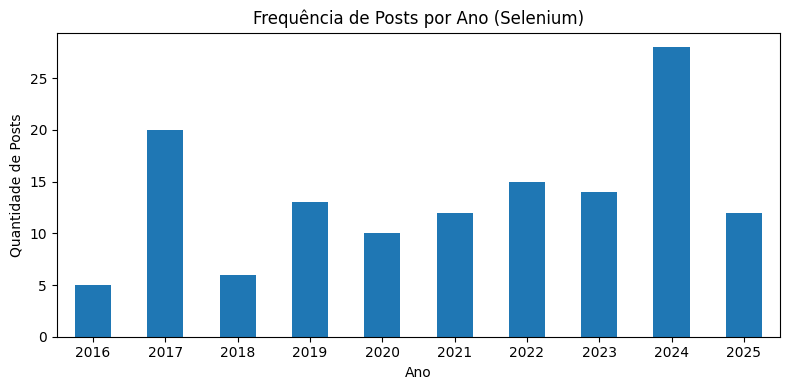

In [29]:
posts_por_ano = df_selenium_posts['ano'].value_counts().sort_index()

plt.figure(figsize=(8, 4))
posts_por_ano.plot(kind='bar')
plt.title('Frequência de Posts por Ano (Selenium)')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Posts')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


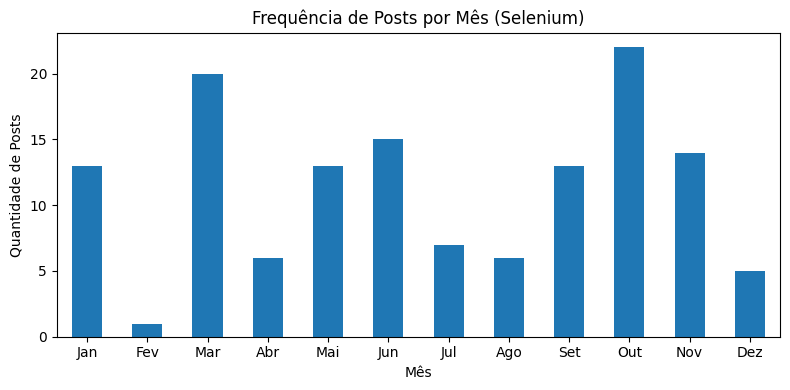

In [ ]:
posts_por_mes = df_selenium_posts['mes'].value_counts().sort_index()

nomes_meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
posts_por_mes.index = [nomes_meses[i - 1] for i in posts_por_mes.index]

plt.figure(figsize=(8, 4))
posts_por_mes.plot(kind='bar')
plt.title('Frequência de Posts por Mês (Selenium)')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Posts')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

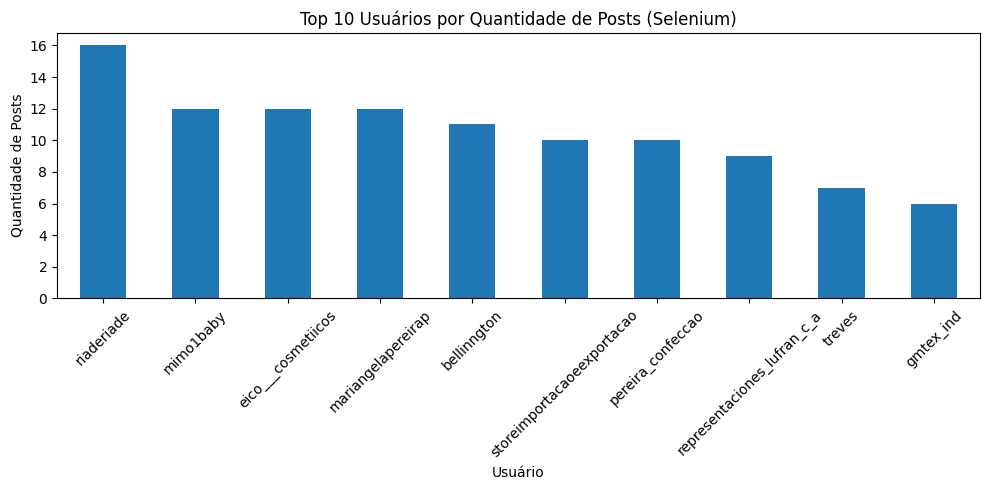

In [ ]:
top_10_usuarios = df_selenium_posts['username'].value_counts().head(10)

plt.figure(figsize=(10, 5))
top_10_usuarios.plot(kind='bar')
plt.title('Top 10 Usuários por Quantidade de Posts (Selenium)')
plt.xlabel('Usuário')
plt.ylabel('Quantidade de Posts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()